**Objective**

Customer segmentation helps businesses identify distinct groups of customers with similar characteristics, preferences, and behaviors. The objective is to tailor marketing campaigns and messages specifically to each segment, increasing the relevance and effectiveness of marketing efforts.

**Importing Libraies**

In [404]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")


In [405]:
#Loading the dataset
customer_data = pd.read_csv("marketing_campaign.csv" , sep="\t")


**Data Understanding**

In [407]:
customer_data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [408]:
# checking the no of samples and attributes in the data
customer_data.shape

(2240, 29)

In [409]:
#checking the data type and count of values of the attributes

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [410]:
#checking the statistics of the data

customer_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [411]:
#checking for duplicate values

customer_data.duplicated().sum()

0

In [412]:
#Checking for missing values

missing_values= customer_data.isnull().sum()
missing_values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Observations :

-> Data has 2240 samples and 29 attributes
-> Dt_Customer attribute has data type as int.
-> The income attribute has 24 missing values.
-> No duplicate values in the data.


**Data Preprocessing**

In [414]:
# Filling the missing values of the income using statistical methods

customer_data['Income'].fillna(customer_data['Income'].median(), inplace = True)

In [415]:
# Coverting date attribute to datetime format
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'] , format = '%d-%m-%Y')

#Finding the oldest customer registration and newset regestration years

min_year = customer_data['Dt_Customer'].dt.year.min()

max_year = customer_data['Dt_Customer'].dt.year.max()

print(min_year , max_year)

2012 2014


In [416]:

#Calculating Age
customer_data['Age'] = max_year - customer_data['Year_Birth']

#Customer_period
customer_data['Days_Customer'] = (customer_data["Dt_Customer"].max()) - (customer_data['Dt_Customer'])

# Calculating Customers Tenures

customer_data['Customer_Tenure'] = max_year- customer_data['Dt_Customer'].dt.year

# Total number of purchases

customer_data['TotalPurchases'] = customer_data.loc[:,'NumDealsPurchases' : 'NumStorePurchases'].sum(axis=1)

# Total number of accepted campaigns
customer_data['Total_Acc_Cmp'] = customer_data.loc[:,'AcceptedCmp3': 'AcceptedCmp2'].sum(axis=1)

customer_data['TotalMntSpent'] = customer_data['MntWines'] + customer_data['MntFruits'] + customer_data['MntMeatProducts'] + customer_data['MntFishProducts'] + customer_data['MntSweetProducts'] + customer_data['MntGoldProds']

# Finding the year ,month and day customers registered

customer_data['Registered_Year'] = customer_data['Dt_Customer'].dt.year
customer_data['Registered_Month'] = customer_data['Dt_Customer'].dt.strftime("%B")


# dividing age into groups
customer_data['Age_Group'] = pd.cut(x = customer_data['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])

# Total children living in the household
customer_data["Children"] = customer_data["Kidhome"] +  customer_data["Teenhome"]

# Finding the level of Education

education_levels = {"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"}
customer_data["Education_Level"] = customer_data["Education"].map(education_levels)



In [417]:
customer_data['Days_Customer'] = customer_data['Days_Customer'].dt.days.astype('int16')


In [418]:
print(customer_data.shape)

(2240, 40)


In [419]:
# Since we have extracted the necessary data , now we drop the attributes that are not required anymore

df = customer_data.copy()
df.drop(['ID','Education','Marital_Status','Customer_Tenure','Registered_Year','Registered_Month','Dt_Customer','Z_CostContact','Z_Revenue'], axis=1, inplace=True)


In [420]:
print(df.shape)

(2240, 31)


In [423]:
#Identifying and treating outliers

num_col = df.select_dtypes(include = np.number).columns

for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df[col].index:
        if df.loc[ind,col]>ul:
            df.loc[ind,col]=ul
        elif df.loc[ind,col]<ll:
            df.loc[ind,col]=ll
        else:
            pass
print("Outliers are handled")

Outliers are handled


**Feature Engineering**

In [424]:
oe = OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']])
df_education = pd.DataFrame(oe.fit_transform(df[['Education_Level']]), columns=['Education_Level'])

In [425]:
df_dummies=pd.get_dummies(df['Age_Group'],drop_first=True)

In [426]:
df.drop(['Education_Level','Age_Group'],axis=1, inplace=True)

In [427]:
df1 = pd.concat([df,df_education,df_dummies], axis=1)
df1.sample(5)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Age,Days_Customer,TotalPurchases,Total_Acc_Cmp,TotalMntSpent,Children,Education_Level,Adult,Middel Aged,Senior Citizen
2189,1972,25224.0,1,0,36,4,9,12,11.0,2,...,42,105,7.0,0,46.0,1.0,0.0,1,0,0
805,1976,49681.0,0,2,66,411,0,26,0.0,0,...,38,237,21.0,0,458.0,2.0,2.0,1,0,0
2070,1949,54591.0,0,1,63,376,4,94,12.0,9,...,65,328,19.0,0,519.0,1.0,1.0,0,0,1
270,1953,69267.0,0,0,31,778,44,499,95.0,73,...,61,645,14.0,0,1635.0,0.0,1.0,0,1,0
1986,1978,57113.0,1,1,45,182,4,33,0.0,2,...,36,508,16.0,0,263.0,2.0,1.0,1,0,0


In [428]:
# scaling all the numeric columns
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age','Days_Customer','TotalMntSpent','TotalPurchases',
       'Total_Acc_Cmp', 'Children']
scaler = StandardScaler()
scaled_df = df1.copy()
scaled_df[num_cols] = scaler.fit_transform(scaled_df[num_cols])

**Clustering**

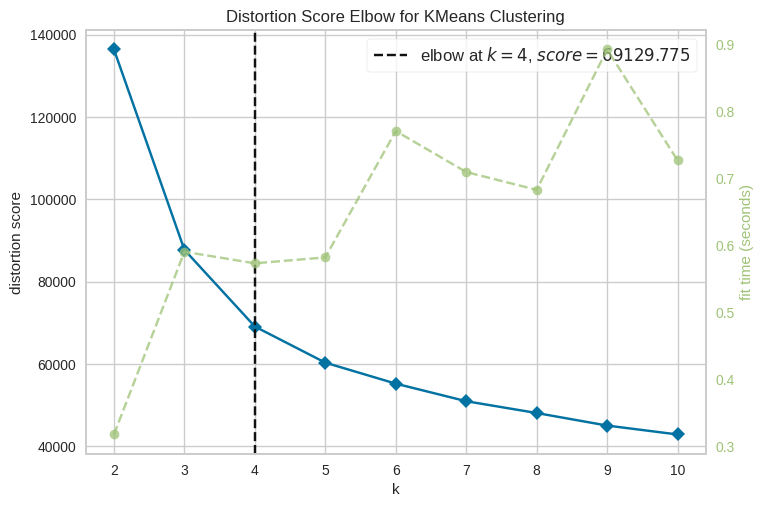

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [429]:
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(scaled_df)
elbow_graph.show()

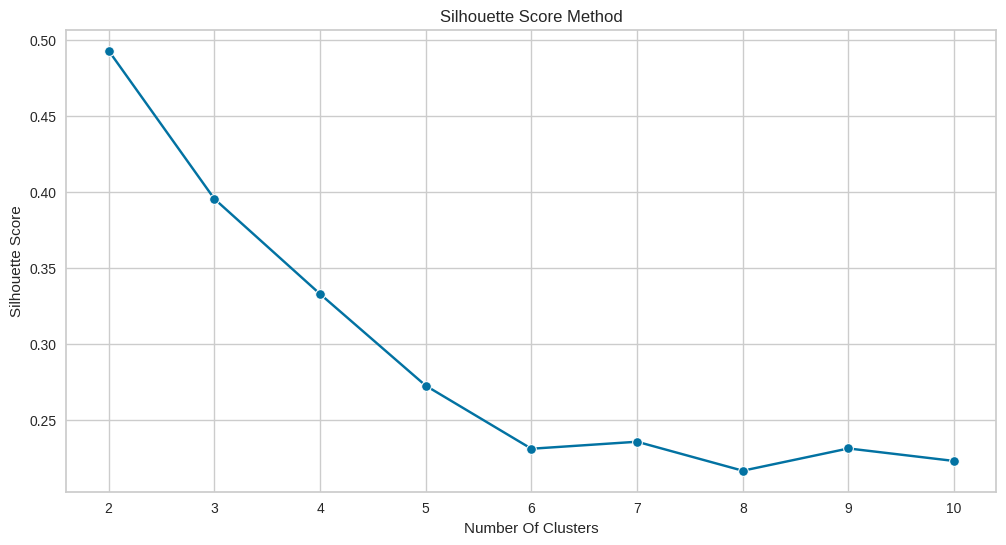

In [430]:
clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
s_scores = [] # silhouette scores

for n in clusters:
    kmeans = KMeans(n_clusters = n, random_state=43).fit(scaled_df)
    silhouette = silhouette_score(scaled_df, kmeans.labels_)
    s_scores.append(silhouette)
plt.figure(figsize=(12,6))
sns.lineplot(x=clusters, y=s_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Since the Silhoutte score is not good ,we have to decrease the features/ perform dimensionality reduction.

**Principal Component Analysis**

Explained Variance Ratio For n_components=1 is 87.90079120878664


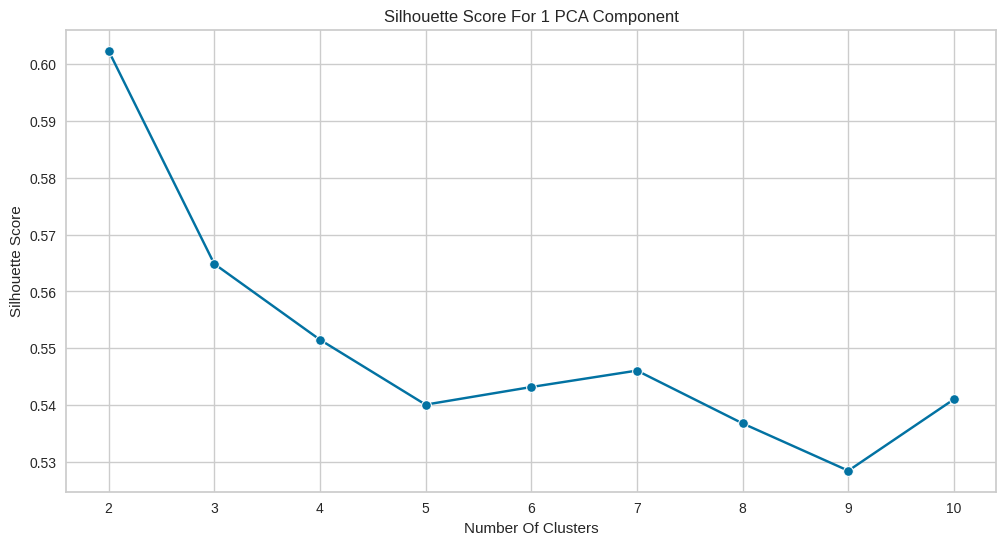

Explained Variance Ratio For n_components=2 is 93.26098715000414


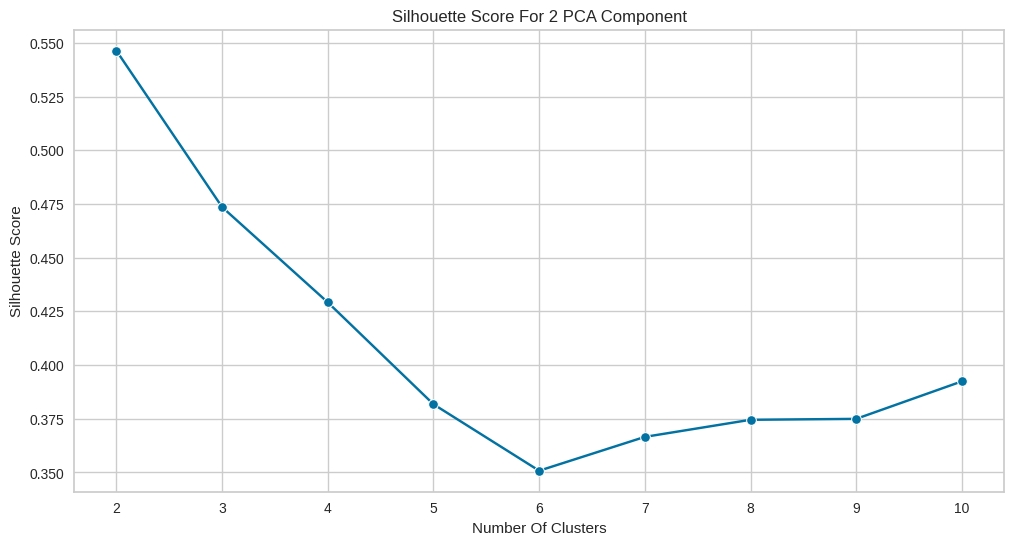

Explained Variance Ratio For n_components=3 is 94.8218585208235


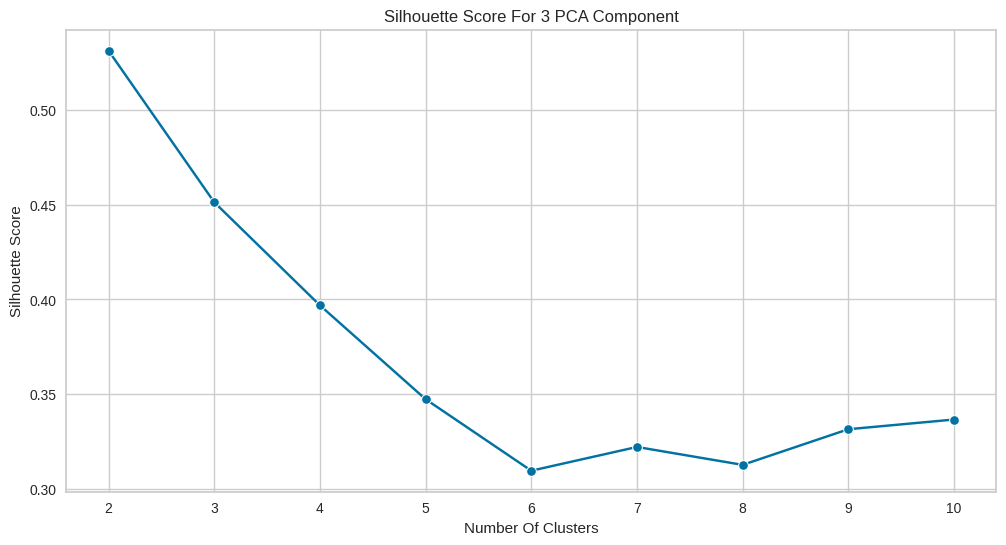

Explained Variance Ratio For n_components=4 is 95.59650011744226


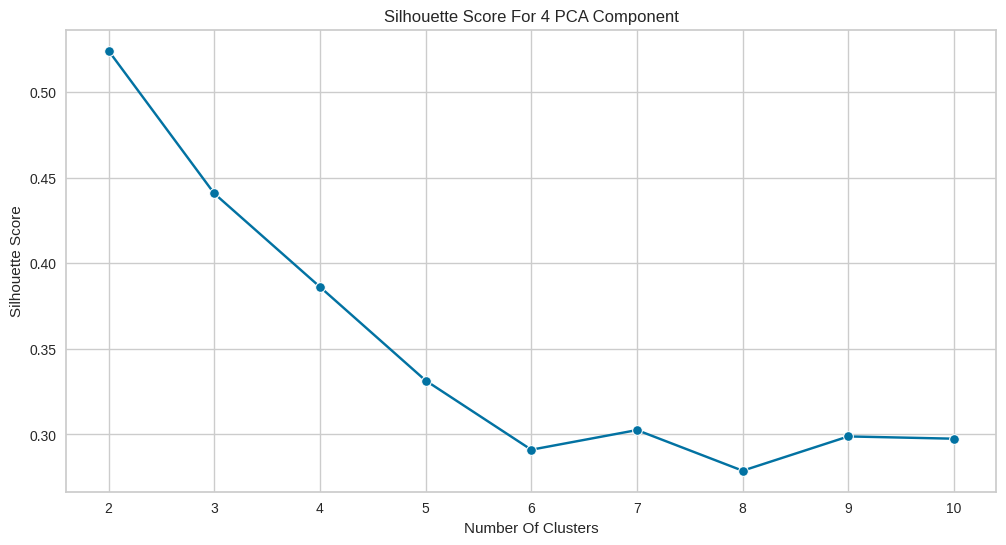

Explained Variance Ratio For n_components=5 is 96.23487540005641


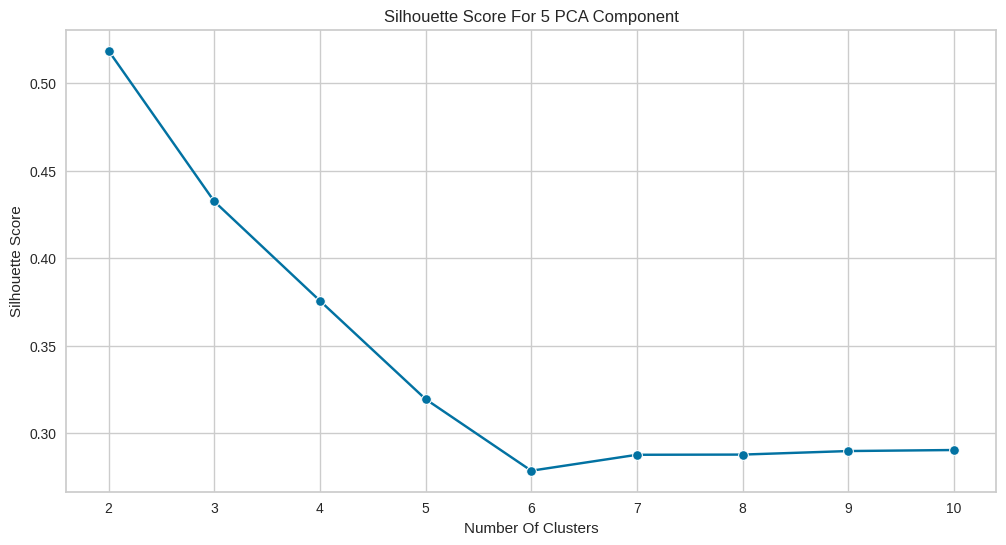

Explained Variance Ratio For n_components=6 is 96.81944417529196


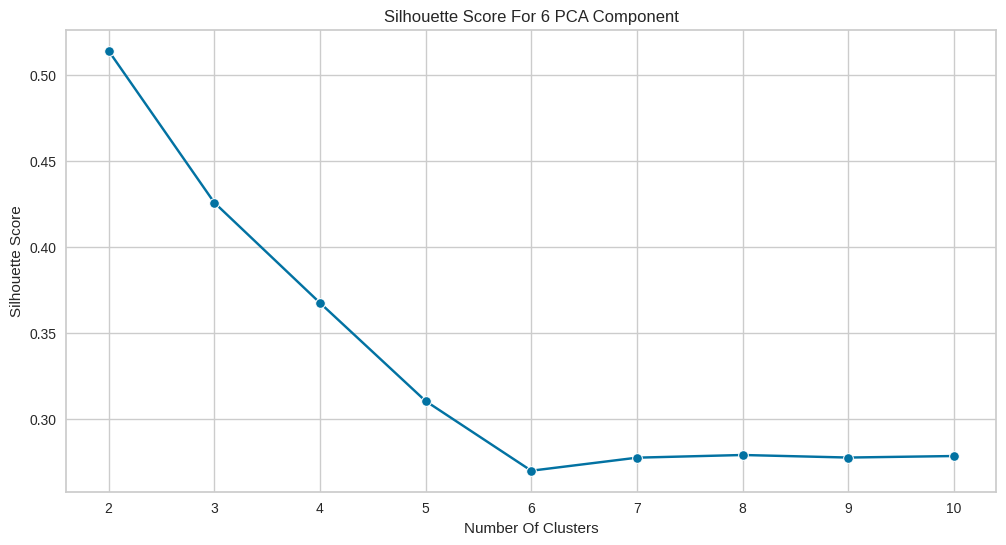

Explained Variance Ratio For n_components=7 is 97.28960677542737


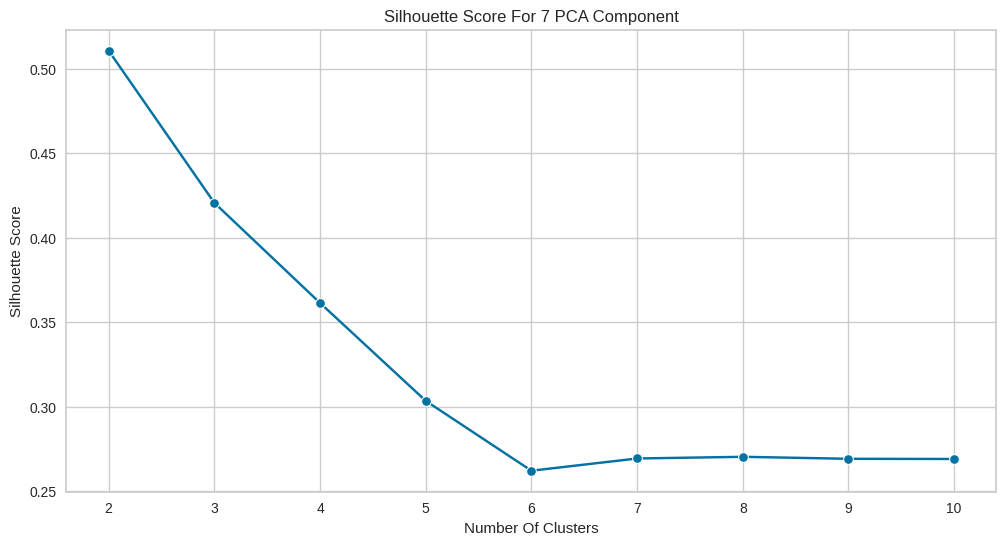

Explained Variance Ratio For n_components=8 is 97.70990003443517


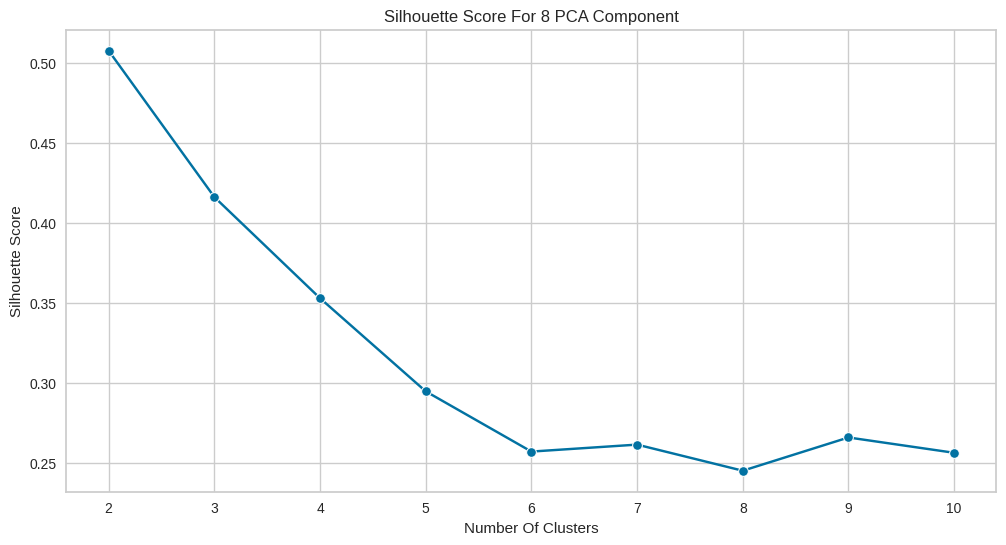

In [432]:
# finding for how many n_components we are getting best silhouette score

components = [1,2,3,4,5,6,7,8]

for n in components:
    pca = PCA(n_components = n, random_state=43)
    pca.fit(scaled_df)
    pca_df = pca.transform(scaled_df)
    print('Explained Variance Ratio For n_components={} is {}'.format(n,pca.explained_variance_ratio_.sum() * 100))
    clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
    s_scores = [] # silhouette scores
    for k in clusters:
        kmeans = KMeans(n_clusters = k, random_state=43).fit(pca_df)
        silhouette = silhouette_score(pca_df, kmeans.labels_)
        s_scores.append(silhouette)

    plt.figure(figsize=(12,6))
    sns.lineplot(x=clusters, y=s_scores, marker='o')
    plt.title('Silhouette Score For {} PCA Component'.format(n))
    plt.xlabel('Number Of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

In [433]:
pca = PCA(n_components=7, random_state=43)
pca.fit(scaled_df)

pca_df = pd.DataFrame(pca.transform(scaled_df), columns=["col1", "col2", "col3", "col4", "col5", "col6", "col7"])

**K-means clustering**



In [434]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Clusters'] = kmeans.fit_predict(pca_df)

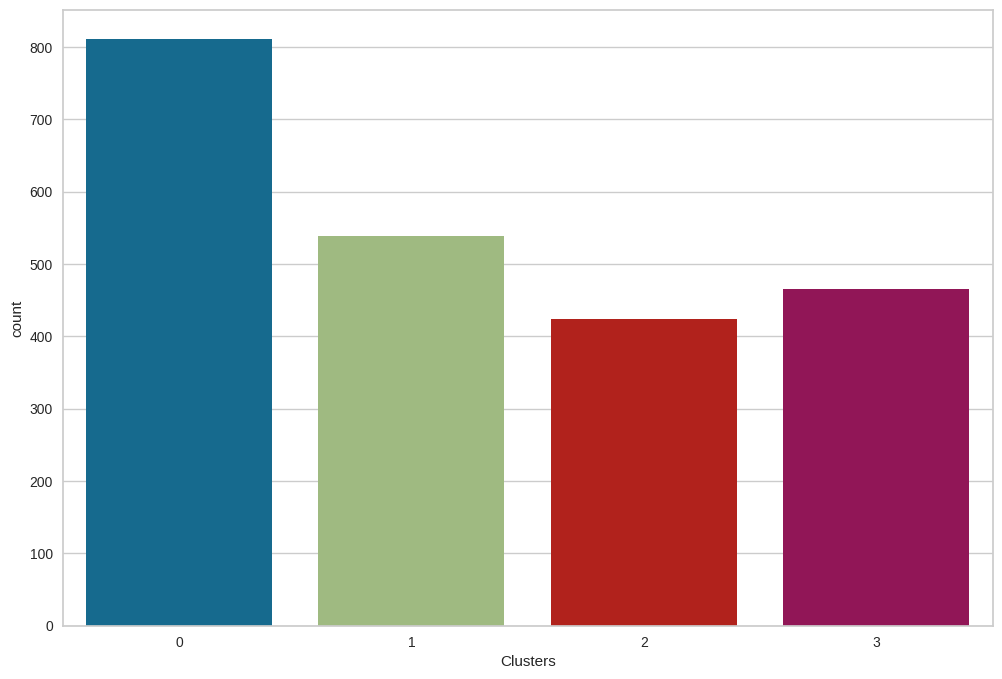

In [435]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=customer_data)
plt.show()

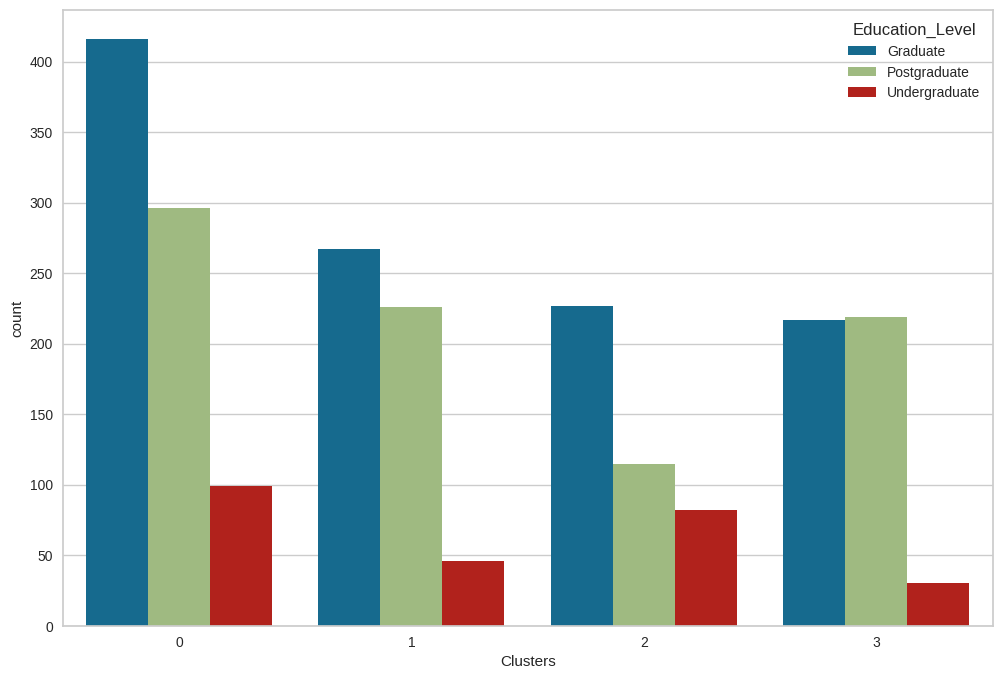

In [436]:
#how  many customers from each cluster has what kind of education level
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=customer_data, hue='Education_Level')
plt.show()

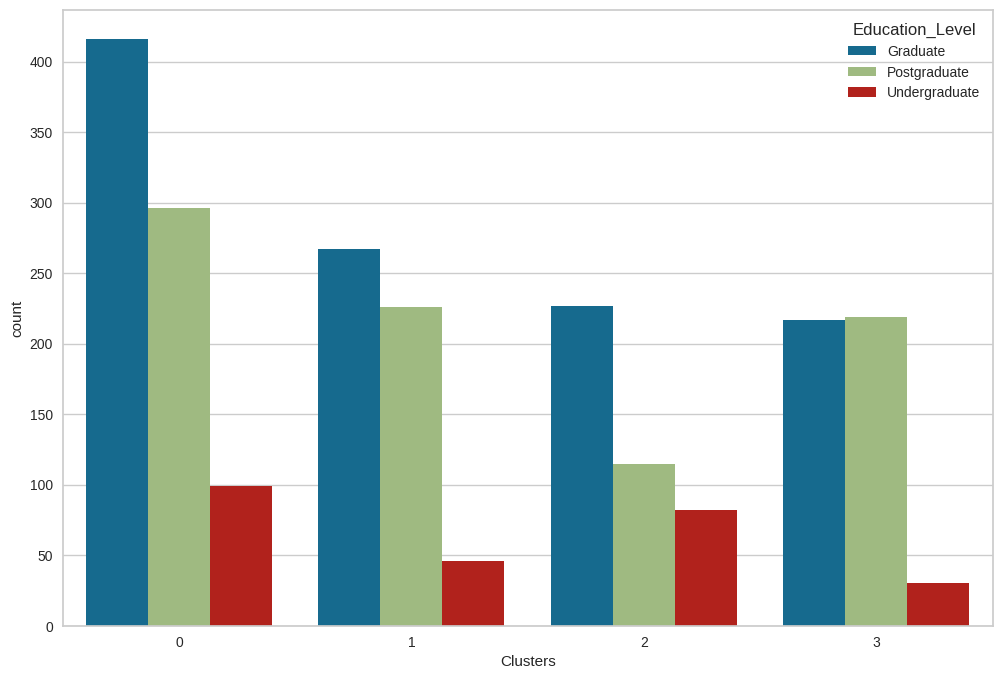

In [437]:
# Number of customers from each cluster have what kind of education level
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=customer_data, hue='Education_Level')
plt.show()


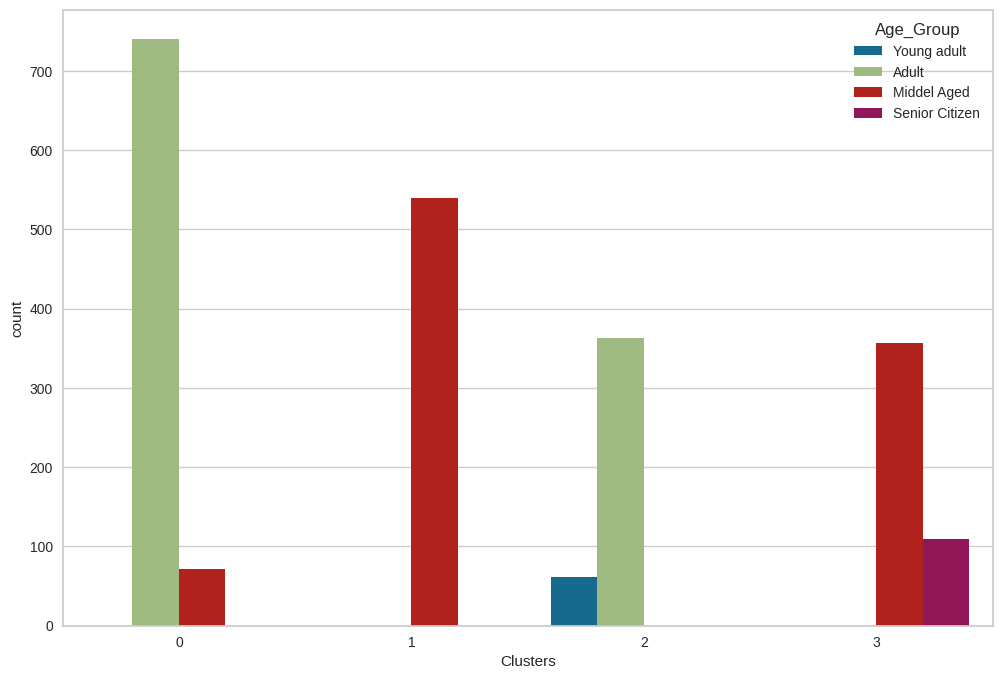

In [438]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=customer_data, hue='Age_Group')
plt.show()

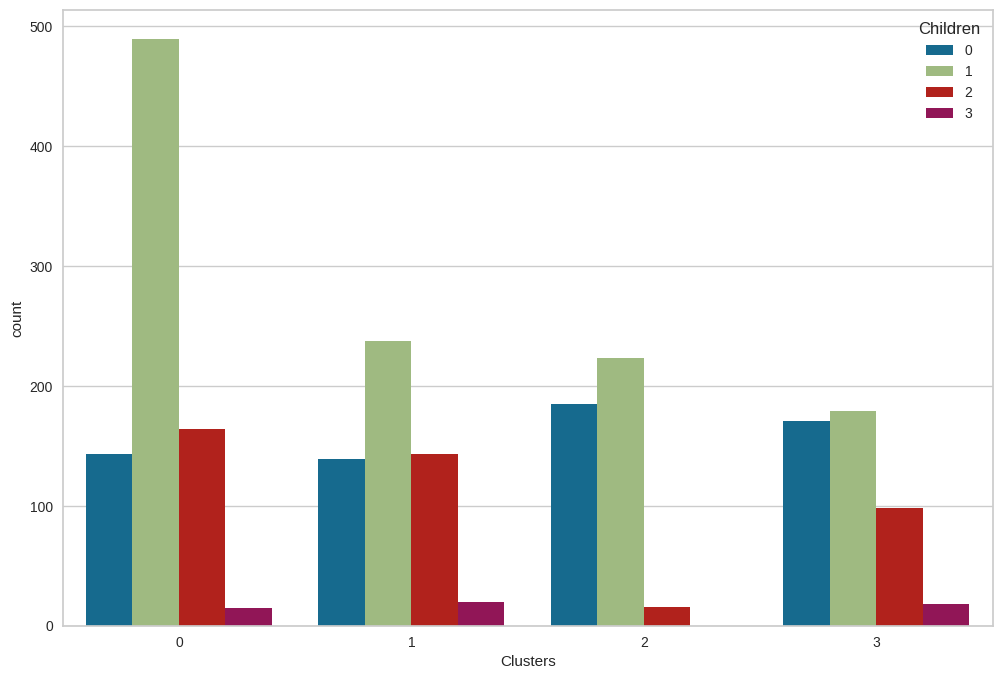

In [439]:
# Now lets findout how  many customers from each cluster has exact number of kids or teens in household
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=customer_data, hue='Children')
plt.show()

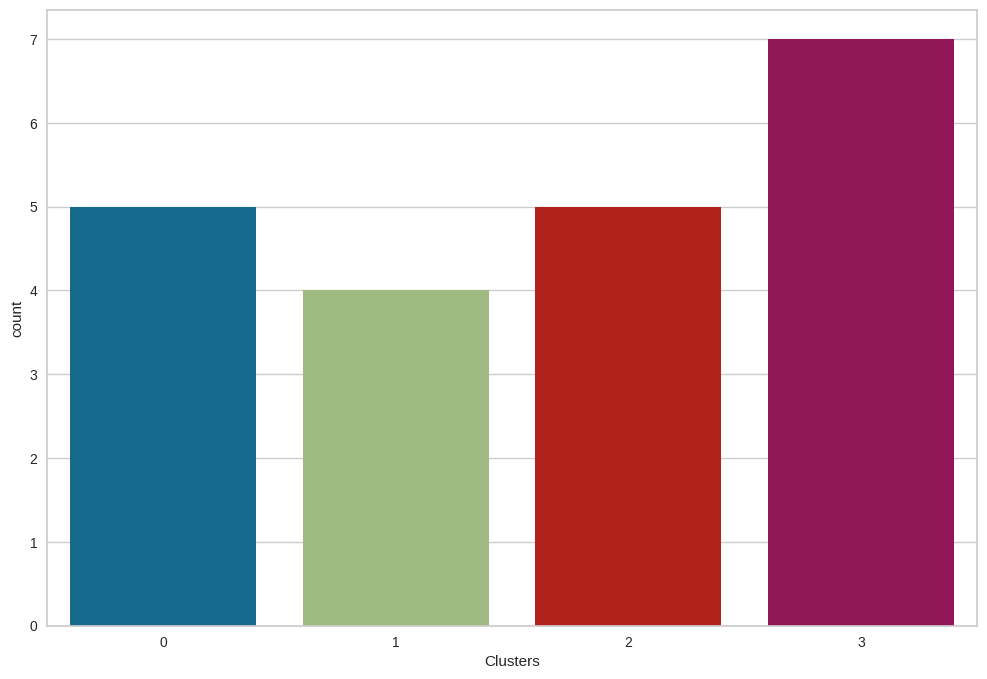

In [447]:
# Now lets findout how  many customers from each cluster have complained
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=customer_data[customer_data['Complain']==1])
plt.show()

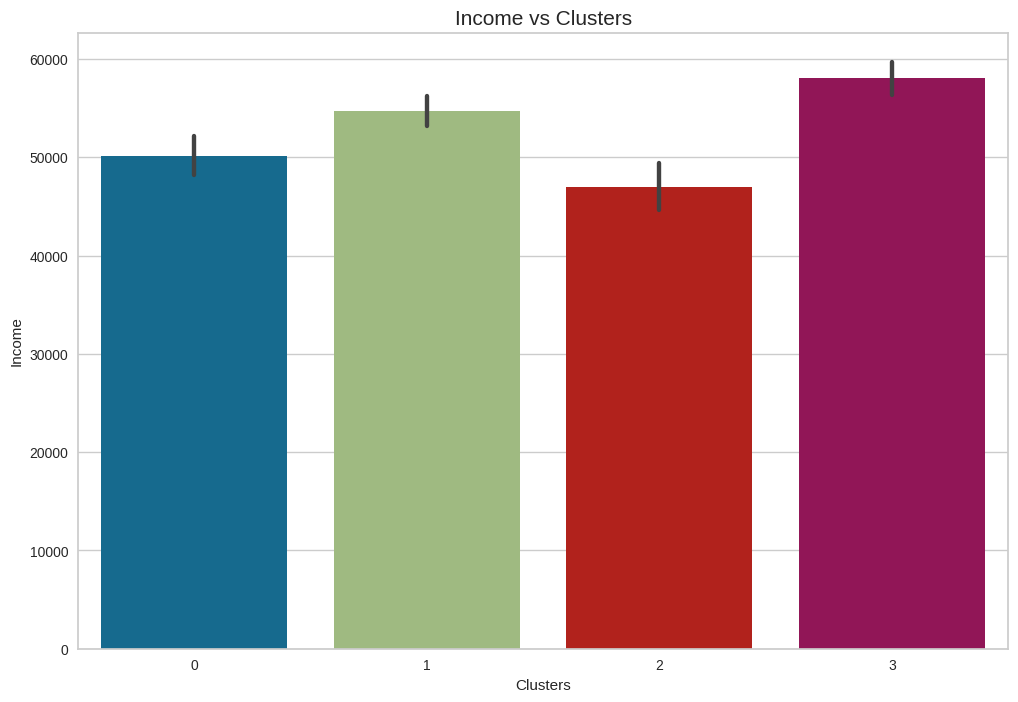

In [442]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=customer_data["Clusters"], y=customer_data["Income"])
plt.title("Income vs Clusters", size=15)
plt.show()


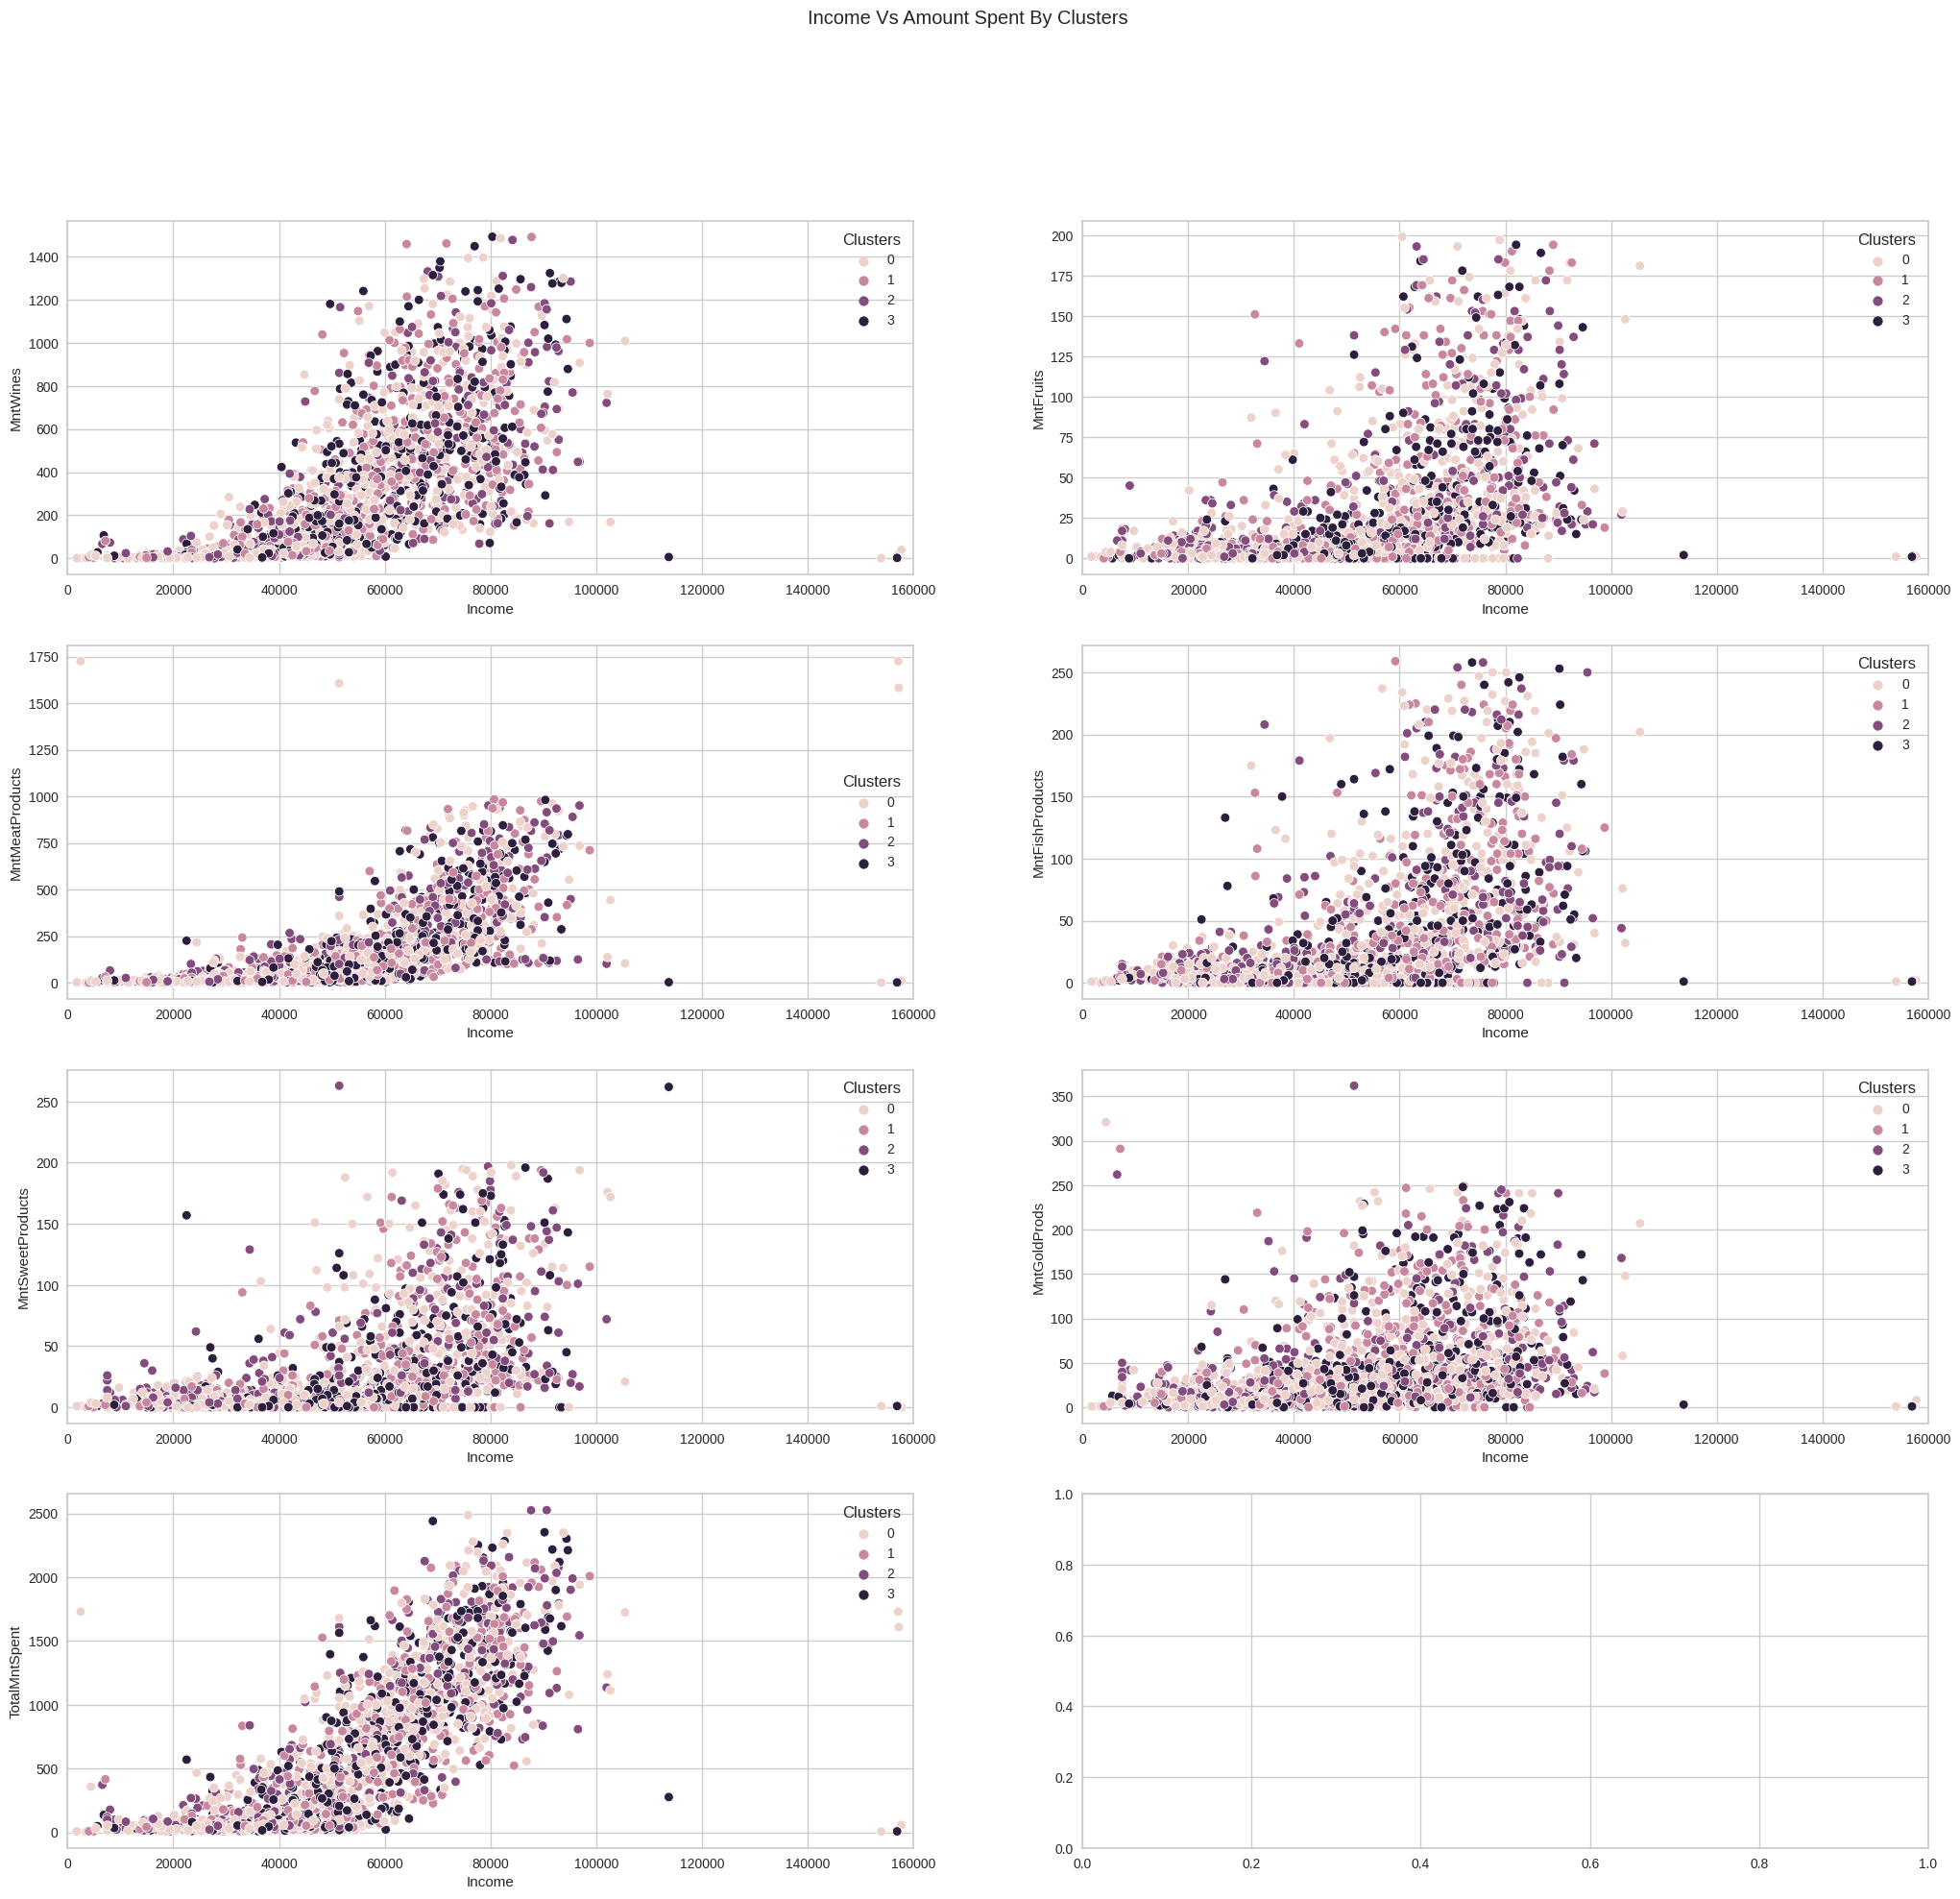

In [458]:
MntColumns= ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','TotalMntSpent']

_, ax1 = plt.subplots(4,2, figsize=(25,22))
plt.suptitle('Income Vs Amount Spent By Clusters')

for i, col in enumerate(MntColumns):
    sns.scatterplot(x='Income', y=col, data=customer_data, ax=ax1[i//2, i%2],hue='Clusters')
    ax1[i // 2, i % 2].set_xlim(xmin=0, xmax=160000)

plt.show()

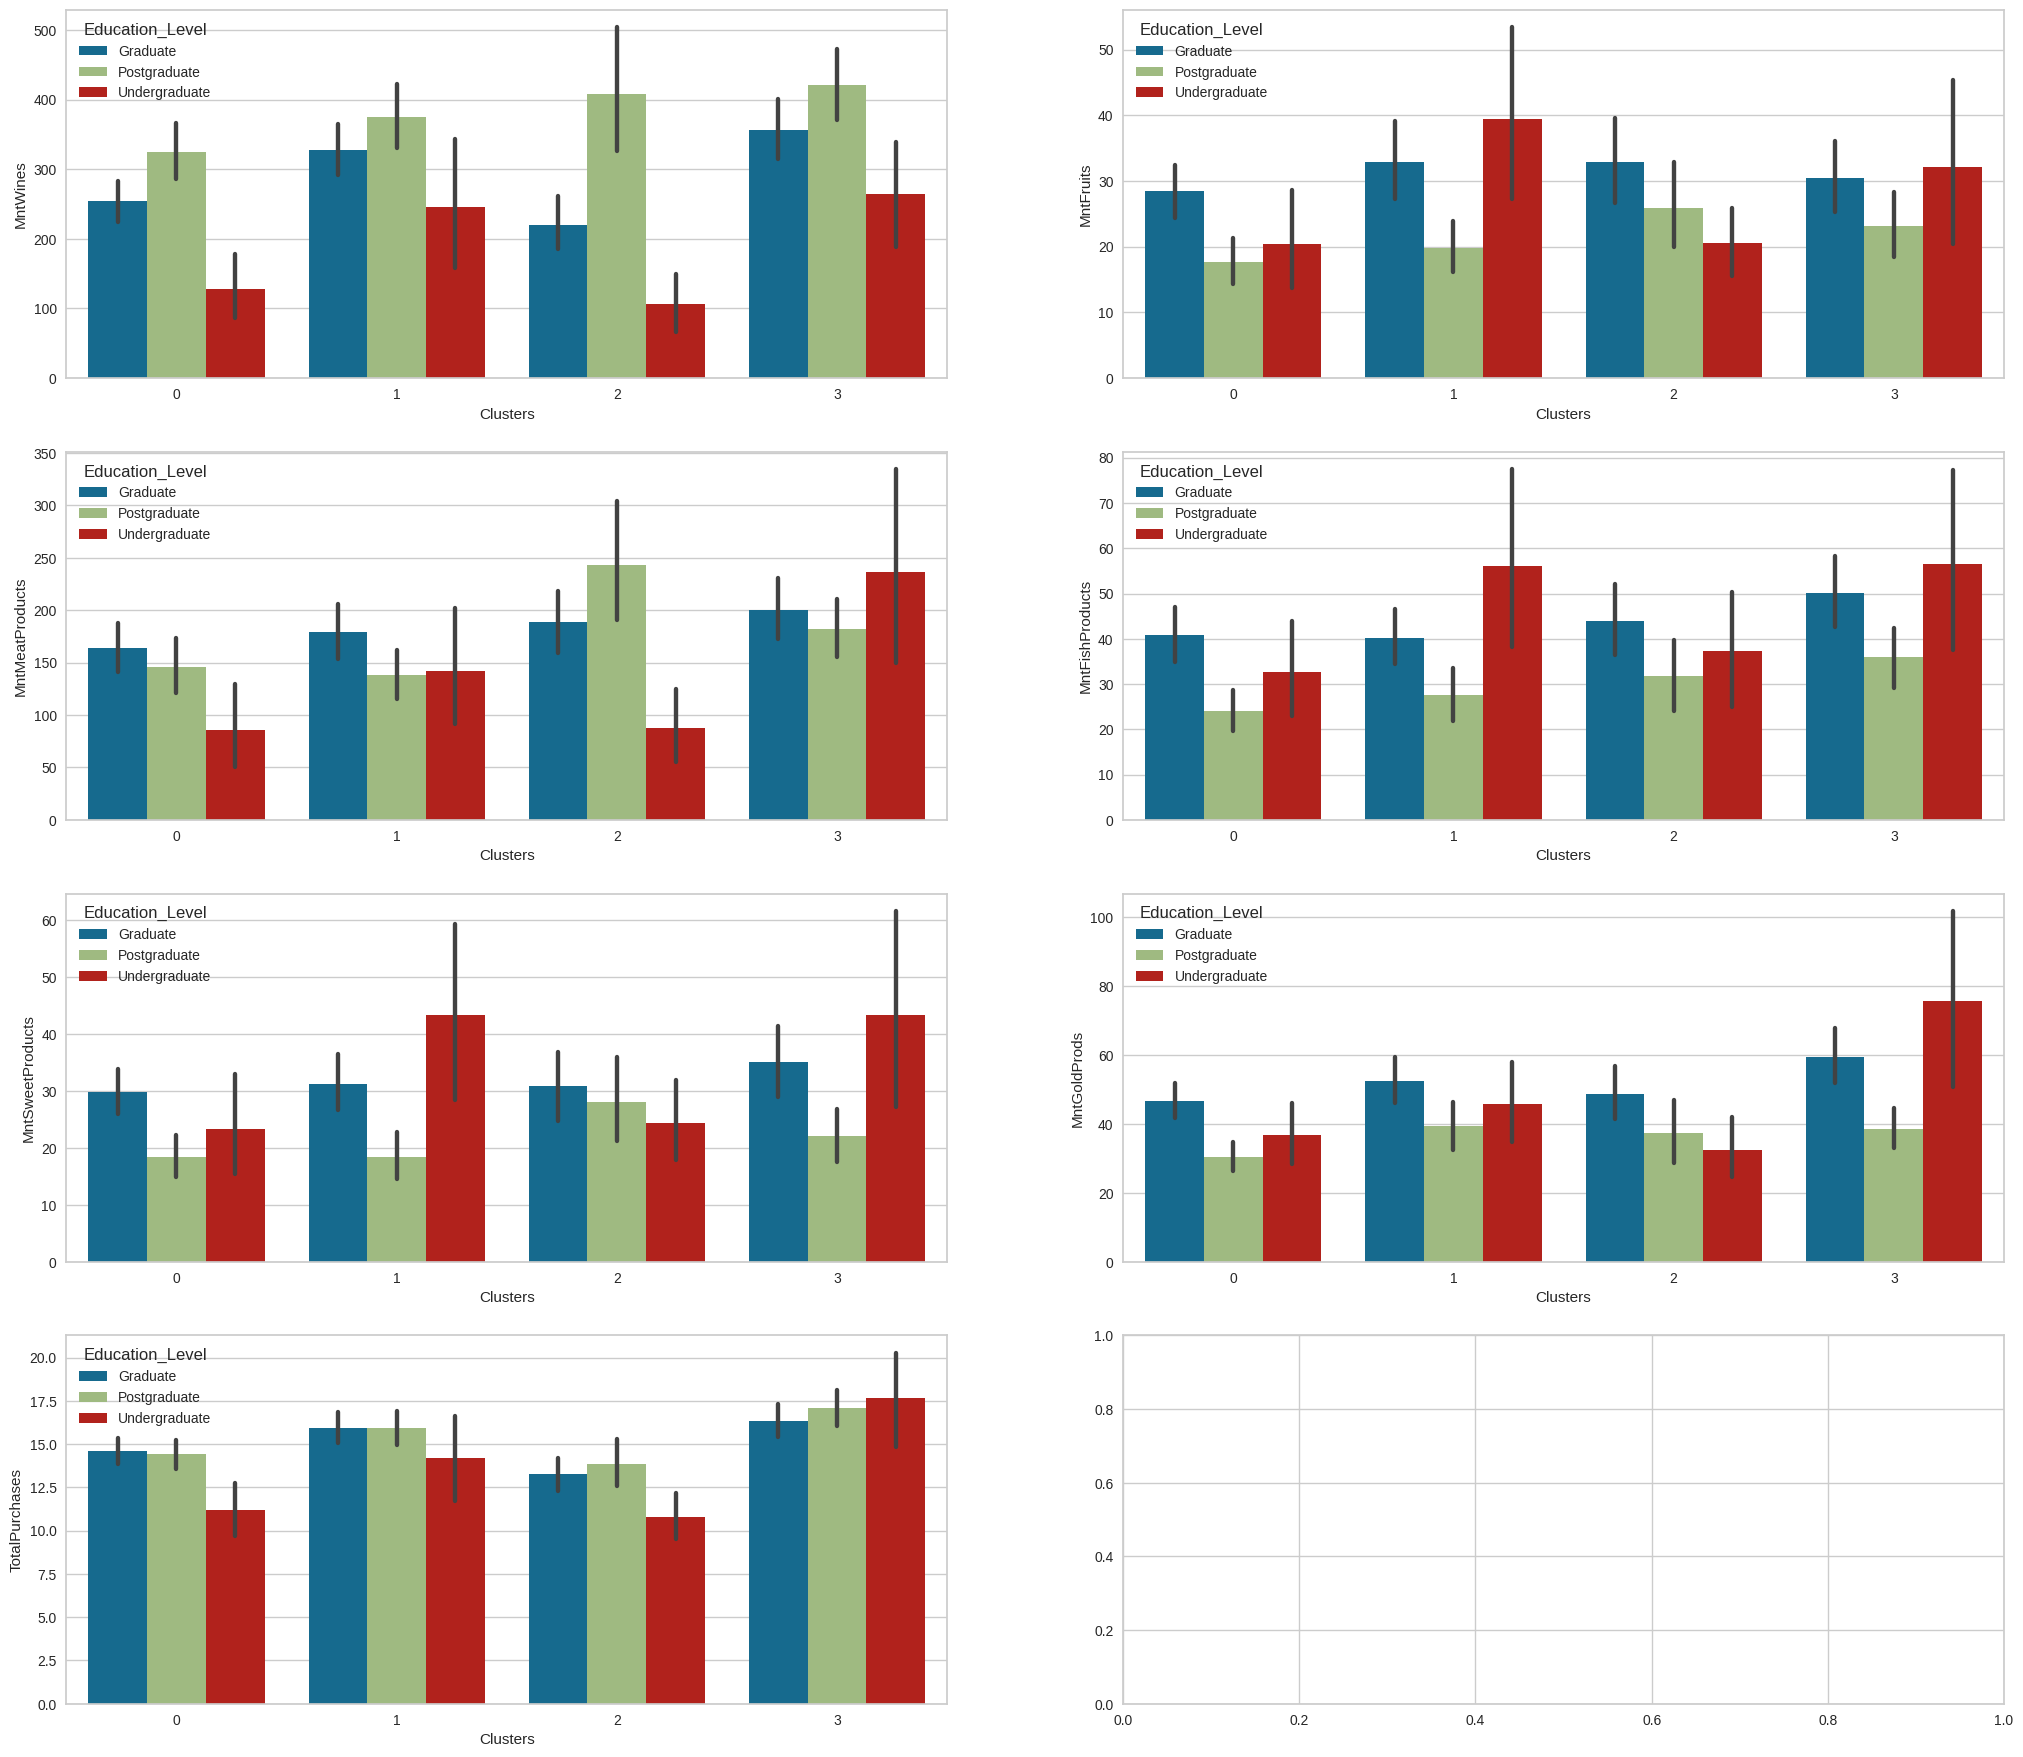

In [449]:
_, ax1 = plt.subplots(4,2, figsize=(25,22))
for i, col in enumerate(MntColumns):
    sns.barplot(x='Clusters', y=col, data=customer_data, ax=ax1[i//2, i%2], hue='Education_Level')

plt.show()

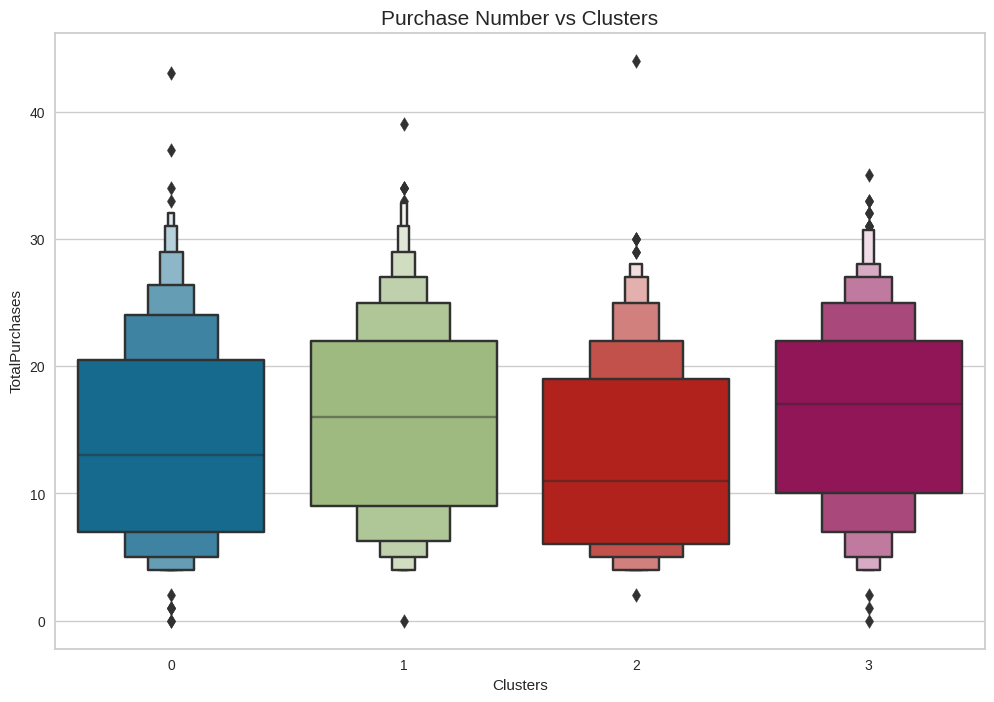

In [450]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=customer_data["Clusters"], y=customer_data["TotalPurchases"])
plt.title("Purchase Number vs Clusters", size=15)
plt.show()

**Conclusion:**

**Clusters 1 and 2 are promising clusters ,where the audience are demonstarting stong characterstics that align with the current business objectives.**

Cluster 1: This cluster consists of well-educated adults and middle-aged individuals with no kids. They have a high income and tend to spend a significant amount of money. They are more inclined towards shopping and generally respond positively to marketing campaigns. However, they are not particularly interested in deals or discounts.

Cluster 2: This cluster has the highest number of customers and primarily includes graduates and postgraduates. The members are mostly middle-aged adults who have either one child or a teenager. They have the second-highest income among the clusters and tend to spend above average. They make a high number of purchases and show a preference for claiming deals.

**Clusters 0 and 3 are underperforming clusters: Need more specific strategies to maximize business outcomes.**

Cluster 0: This cluster has the least number of customers and consists of graduates and postgraduates. It has a higher proportion of middle-aged individuals compared to adults. The members typically have two kids or teenagers. They have an average income and tend to spend less. They engage in less shopping and are not particularly attracted to marketing campaigns. However, they show a preference for deals and discounts.

Cluster 3: This cluster includes graduates and undergraduates with a large number of adult members. They have a low income and typically have either no children or one child. They exhibit low expenditure and engage in less shopping. They have accepted only a few marketing campaigns and deals.